In [25]:
!pip install -q transformers datasets evaluate accelerate pillow torchvision scikit-learn

In [28]:
from datasets import load_dataset

dataset = load_dataset("garythung/trashnet")

In [29]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5054
    })
})

In [30]:
import pandas as pd
labels = dataset['train']['label']
dataframe = pd.DataFrame(labels, columns=['labels'])

In [31]:
images_width = []
images_height = []
for i in range(dataset['train'].num_rows):
  image_size = dataset['train'][i]['image'].size
  images_height.append(image_size[0])
  images_width.append(image_size[1])

In [32]:
dataframe['width'] = images_width
dataframe['height'] = images_height

<Axes: xlabel='labels'>

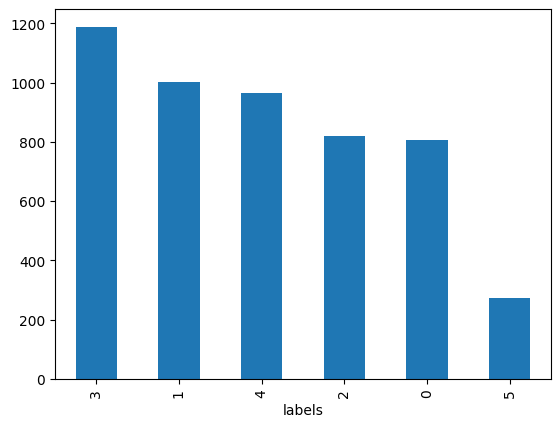

In [33]:
dataframe.labels.value_counts().plot(kind='bar')

In [34]:
import numpy as np
image_red = []
image_green = []
image_blue = []
for i in range(dataset['train'].num_rows):
  image = dataset['train'][i]['image']
  image_array = np.array(image)
  image_R = image_array.copy()
  image_R[:, :, (1, 2)] = 0
  image_G = image_array.copy()
  image_G[:, :, (0, 2)] = 0
  image_B = image_array.copy()
  image_B[:, :, (0, 1)] = 0

  image_red.append(image_R.mean())
  image_green.append(image_G.mean())
  image_blue.append(image_B.mean())

In [35]:
dataframe['red_channels_avg'] = image_red
dataframe['blue_channels_avg'] = image_blue
dataframe['green_channels_avg'] = image_green

In [36]:
dataframe

,labels,width,height,red_channels_avg,blue_channels_avg,green_channels_avg
0,0,4032,3024,63.032807,42.132425,51.831173
1,0,4032,3024,61.860872,47.497749,54.481428
2,0,3024,4032,62.042348,58.851847,60.473905
3,0,4032,3024,49.553190,34.308711,42.459938
4,0,4032,3024,57.663165,50.830041,54.546133
...,...,...,...,...,...,...
5049,5,384,512,64.760495,52.561018,59.877438
5050,5,384,512,60.329883,44.131785,53.632607
5051,5,384,512,64.619239,53.493554,60.500622
5052,5,384,512,59.928221,50.428253,57.213803


In [37]:
dataframe.describe()

,labels,width,height,red_channels_avg,blue_channels_avg,green_channels_avg
count,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000
mean,2.261971,1935.832212,1943.370004,57.196971,51.401161,54.395853
std,1.501312,1597.154334,1483.555358,6.500522,9.174976,6.988708
min,0.000000,384.000000,512.000000,26.232379,17.854498,21.879618
25%,1.000000,384.000000,512.000000,54.360311,45.068810,50.265005
50%,2.000000,1416.000000,1480.000000,57.813197,52.919063,55.863051
75%,3.000000,3264.000000,3024.000000,61.221709,58.779129,59.046998
max,5.000000,4032.000000,4032.000000,75.941632,74.081441,74.413644


In [24]:
dataframe.groupby(by='labels').agg({
    "width":"mean",
    "height":"mean",
    "red_channels_avg":"mean",
    "green_channels_avg":"mean",
    "blue_channels_avg":"mean",
})

,width,height,red_channels_avg,green_channels_avg,blue_channels_avg
labels,,,,,
0,1846.213400,1979.712159,56.683091,49.629930,42.631454
1,1982.035928,1865.197605,58.764572,56.859071,54.357843
2,1978.653659,1882.614634,54.923815,52.349437,50.623057
3,1991.878788,1980.727273,57.401031,54.850510,51.811880
4,1871.402490,1991.668050,57.002359,56.718130,56.311011
5,1886.014599,1972.262774,59.578806,55.390171,49.659567


# Important Points
- the dataset only have 5054 samples with imbalance classes.
- The image sizes vary, but the average size of each class is not much different
- In the distribution of channel values, there are also no significant differences in each class, the red channel is the channel with the most dominant average value in each class.

From the points above it can be concluded that in terms of the three colors and sizes of each class there are no significant differences, so the model that is suitable for this dataset is a model that is able to efficiently learn line and angle patterns from images. The dataset also only has a sample size of 5054 with an unbalanced nature, this is also a special concern when choosing a model.